## Лабораторна робота №2: "Імплементація алгоритмів стиснення"

Склад команди та розподіл виконаних завдань:

- Сірська Марія: алгоритм Гафмана, lzw 
- Діжак Назар: алгоритм lz77

Для кожного з алгоритмів поданих нижче
- опишіть як працює алгорит
- напишіть класи з методами encode та decode
- перевірте правильність кодування та декодування
- дослідіть час виконання коду в залежності від розмірів вхідних даних
- оцініть ступінь стиснення(у відсотка) в залежності від розмірів
- напишіть висновок про ефективність різних алгоритмів та умови за яких той чи інший алгоритм дають кращий результат

# Алгоритм Гаффмана

В цьому алгоритмі доцільно імплементувати клас node та додаткові функції в Huffman для побудови дерева кодування

In [62]:
class Huffman:
    def encode(self, text: str) -> tuple[str, dict[str, str]]:
        dct, elems, res = {}, {}, []
        for i in set(text):
            dct[i] = text.count(i)/len(text)
        dct = {i:dct[i] for i in sorted(dct)}
        lst = sorted(dct, key = lambda x : dct[x], reverse = True)
        itms = lst[:]
        for el in itms:
            elems[el] = ''
        while len(lst)>1:
            lst = sorted(lst, key = lambda x : dct[x], reverse = True)
            dct[lst[-1]+lst[-2]] = dct[lst[-1]] + dct[lst[-2]]
            for lett in lst[-1]:
                elems[lett] = '1' + elems[lett]
            for lett in lst[-2]:
                elems[lett] = '0' + elems[lett] 
            lst.append(lst[-1]+lst[-2])
           # res = [{lst[-1]:dct[lst[-1]],lst[-2]:dct[lst[-2]]}, res]
            lst.pop(-2)
            lst.pop(-2)
        new = ''
        for i in text:
            new += elems[i]
        return new, elems

    def decode(self, code: str, coding_dict: dict[str, str]):
        decoded = ''
        rest = ''
        for num in code:
            #print(num)
            num = rest + num
            if num in coding_dict.values():
                for key, val in coding_dict.items():
                    if val == num:
                        decoded += key
                        rest = ''
            else:
                rest = num
        return decoded

In [46]:
import random
import string
a = Huffman()
characters = string.ascii_letters + string.digits + string.punctuation + ' '
for t in range(100,500) :
    text = ''.join(random.choice(characters) for _ in range(t))
    m = a.encode(text)
    assert text == a.decode(m[0], m[1])


0.0 0.0014791488647460938
0.0 0.0010044574737548828
0.0019953250885009766 0.010100364685058594
0.0019941329956054688 0.01679229736328125
0.002012968063354492 0.03779411315917969
0.003567934036254883 0.1087491512298584
0.002570629119873047 0.16222167015075684
0.006222963333129883 0.3466222286224365


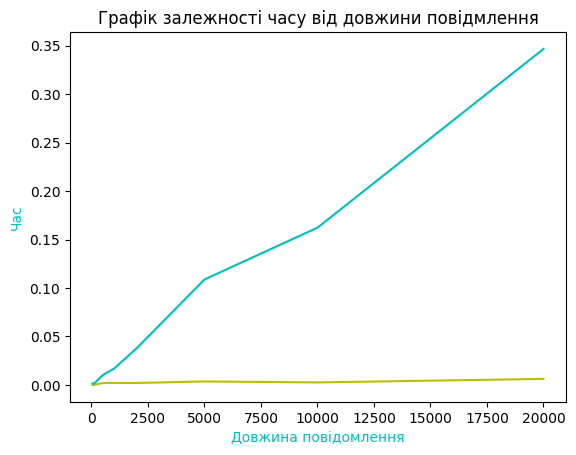

In [32]:
a = Huffman()


import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import random
import string

characters = string.ascii_letters + string.digits + string.punctuation + ' '
losses, losses2, result1, result2 = [], [], [], []
nums = [50, 100,500, 1000, 2000, 5000, 10000, 20000]
for t in nums:
        if isinstance(t, str):
                sentence = str([i for i in open(t, 'r', encoding='utf-8')])
        sentence = ''.join(random.choice(characters) for _ in range(t))
        start = time.time()
        m = a.encode(sentence)
        end = time.time()
        time_taken = (end - start)

        start2 = time.time()
        v = a.decode(m[0], m[1])
        end2 = time.time()
        time_taken2 = (end2 - start2)
        
        print(time_taken, time_taken2)
        assert v==sentence # тестування алгоритму

        losses.append(time_taken)
        losses2.append(time_taken2)

        result1.append(time_taken/len(sentence))
        result2.append(time_taken2/len(sentence))

Y = np.array([i for i in losses])
X = np.array([i for i in nums])
P = np.array([i for i in losses2])
plt.title("Графік залежності часу від довжини повідмлення")                                                                                                                                                                                        
plt.xlabel('Довжина повідомлення', c = 'c')
plt.ylabel('Час', c = 'c')
plt.plot(X, Y, c = 'y') # жовтий - encode
plt.plot(X, P, c= 'c') # синій - decode
plt.show()



#plt.title("Графік залежності часу від довжини повідмлення2")                                                                                                                                                                                        
#plt.xlabel('Довжина повідомлення', c = 'c')
#plt.ylabel('Час ', c = 'c')
#W = np.array([i for i in result1])
#H = np.array([i for i in result2])
#plt.plot(X, W, c = 'y') # жовтий - encode
#plt.plot(X, H, c= 'c') # синій - decode
#plt.show()

#Чим довше повідомлення, тим більше потрібно часу
#Якщо ж поділити час на кількість ітерацій, на початкових етапах треба трохи більше часу 
#Алгоритм розкодування значно швидший ніж алгоритм кодування


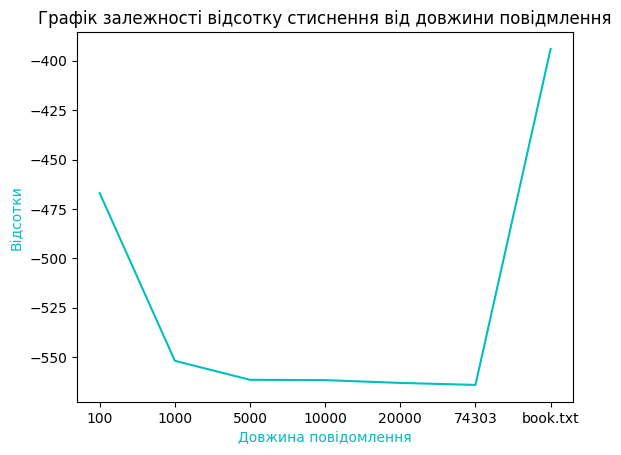

In [34]:
a = Huffman()

import matplotlib.pyplot as plt
import numpy as np

import random
import string

characters = string.ascii_letters + string.digits + string.punctuation + ' '
#94604
nums = [100,1000, 5000, 10000, 20000, 74303, 'book.txt']
length = []
for t in nums:
        if isinstance(t, str):
            sentence = str([i for i in open(t, 'r', encoding='utf-8')])
        else:
            sentence = ''.join(random.choice(characters) for _ in range(t))
        m = a.encode(sentence)
        length.append(100 - (len(m[0])/len(sentence)*100))

X = np.array([i for i in nums])
P = np.array([i for i in length])
plt.title("Графік залежності відсотку стиснення від довжини повідмлення")                                                                                                                                                                                        
plt.xlabel('Довжина повідомлення', c = 'c')
plt.ylabel('Відсотки', c = 'c')
plt.plot(X, P, c= 'c')
plt.show()

#Як бачимо на графіку, чим довший текст, тим менший відсоток стиснення,
# але, алгоритм набагато ефективніший при кодуванні книг ніж при послідовності радномних символів
# аналогічної довжини, оскільки в текстах часто повторюються слова


# Алгоритм LZW

In [56]:
class LZW:
    def encode(self, text: str) -> tuple[str, list]:
        lst = text
        the_set = sorted(list(set(lst))) 
        dct = {i+1: the_set[i] for i in range(len(the_set))}
        pas, res = 0, []
        for index, i in enumerate(lst):
            if pas!=0:
                pas -= 1
            else:
              added  = False
              if i in dct.values():
                for k in range(len(lst)-index+1):
                    if lst[index:index+k+1] not in dct.values()and all([i in dct.values() for i in  lst[index:index+k]]):
                        dct[len(dct)+1] = lst[index:index+k+1]
                        for m in dct:
                            if dct[m] ==  lst[index:index+k]:
                                res.append(m)
                                added = True
                        pas = k-1
                        break
              if added == False:
                for m in dct:
                   if dct[m] ==  i:
                       res.append(m)
                       if pas!=0:
                           pas -= 1
        return res, dct

    def decode(self, code: str, coding_dict: list) -> str:
        new = ''
        lst = code
        previous = None
        for i in lst:
            if i in coding_dict:
                new+= coding_dict[i]
                if previous:
                    coding_dict[len(coding_dict)+1] = previous + coding_dict[i][0]
                previous = coding_dict[i]
        return new

In [57]:
import random
import string
a = LZW()
characters = string.ascii_letters + string.digits + string.punctuation + ' '
for t in range(100,500) :
    text = ''.join(random.choice(characters) for _ in range(t))
    m = a.encode(text)
    assert text == a.decode(m[0], m[1])


0.0022630691528320312 0.0
0.050660133361816406 0.0
0.13391995429992676 0.000997781753540039
0.27910804748535156 0.0
1.358595371246338 0.003241300582885742
4.855206727981567 0.003951072692871094


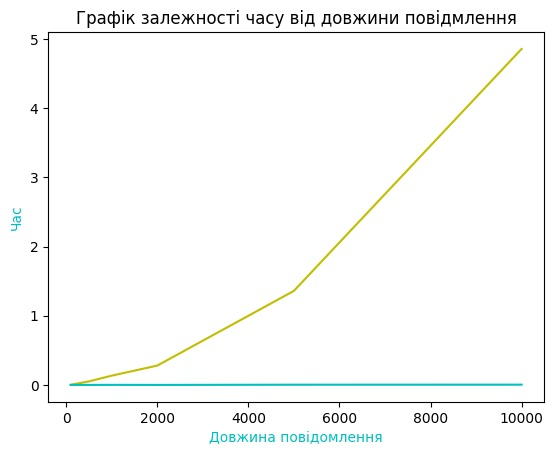

In [58]:
a = LZW()


import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import random
import string

characters = string.ascii_letters + string.digits + string.punctuation + ' '
losses, losses2 = [], []
nums = [100,500, 1000, 2000, 5000, 10000]
for t in nums:
        if isinstance(t, str):
                sentence = str([i for i in open(t, 'r', encoding='utf-8')])
        sentence = ''.join(random.choice(characters) for _ in range(t))
        start = time.time()
        m = a.encode(sentence)
        end = time.time()
        time_taken = (end - start)

        start2 = time.time()
        v = a.decode(m[0], m[1])
        end2 = time.time()
        time_taken2 = (end2 - start2)
        
        print(time_taken, time_taken2)
        assert v==sentence #тестування алгоритму

        losses.append(time_taken)
        losses2.append(time_taken2)

Y = np.array([i for i in losses])
X = np.array([i for i in nums])
P = np.array([i for i in losses2])
plt.title("Графік залежності часу від довжини повідмлення")                                                                                                                                                                                        
plt.xlabel('Довжина повідомлення', c = 'c')
plt.ylabel('Час', c = 'c')
plt.plot(X, Y, c = 'y') # жовтий - encode
plt.plot(X, P, c= 'c') # синій - decode
plt.show()
#Чим довше повідомлення, тим більше потрібно часу
#Алгоритм розкодування значно швидший ніж алгоритм кодування


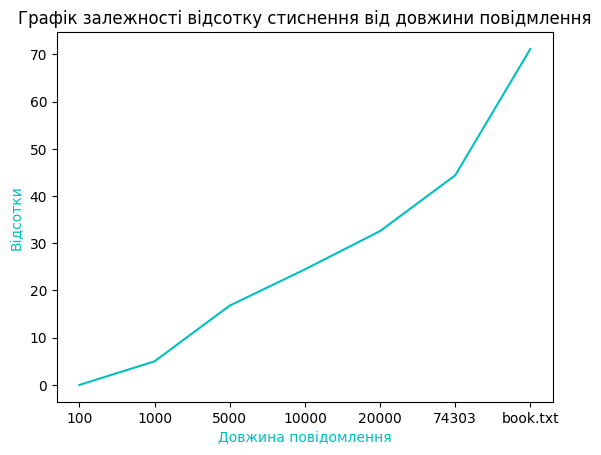

In [55]:
a = LZW()

import matplotlib.pyplot as plt
import numpy as np

import random
import string

characters = string.ascii_letters + string.digits + string.punctuation + ' '
#94604
nums = [100,1000, 5000, 10000, 20000, 74303, 'book.txt']
length = []
for t in nums:
        if isinstance(t, str):
            sentence = str([i for i in open(t, 'r', encoding='utf-8')])
        else:
            sentence = ''.join(random.choice(characters) for _ in range(t))
        m = a.encode(sentence)
        length.append(100 - (len(m[0])/len(sentence)*100))

X = np.array([i for i in nums])
P = np.array([i for i in length])
plt.title("Графік залежності відсотку стиснення від довжини повідмлення")                                                                                                                                                                                        
plt.xlabel('Довжина повідомлення', c = 'c')
plt.ylabel('Відсотки', c = 'c')
plt.plot(X, P, c= 'c')
plt.show()

#Як бачимо на графіку, чим довший текст, тим більший відсоток стиснення
# Також, алгоритм ефективніший при кодуванні книг ніж при послідовності радномних символів
# аналогічної довжини, оскільки в текстах часто повторюються слова, стиснення доходить до 70%


In [45]:
import random
import string

characters = string.ascii_letters + string.digits + string.punctuation + ' '

random_string = ''.join(random.choice(characters) for _ in range(1000))

print(random_string)


;B0<TdhV1n/fR/6Xa|N\MY.?jK]dPWWVskSC)s[8]eb*Y*N^_=-cxv?{%:KK&1Z(uH$Ml#Nl>R?"D CosZ!-?f2yKG'')yEk;%p^@0u]vnFqWB4<Q)DO!fJ!<~orD-7f+L97 +r1[[$//#;?26a'qGxRJH,4)p0'~|Yt1exG_0D"c\!#0id!e[T`)k@xl'br6{b0~BOloM*}!gTVI7Ry;]K\Z#c-umddkO3o*{QyD`mWdE-hka9} YA+&+^]bug+H[}uS<}zxYkoI*HsFzROD[Iys}Iadf_QcLvd*@}Rc;!/eZ$bzR'EfD&ISc/*!`fK,%<C;Aj~sk`q)wM6>sBgv1/nx$|R4x;!MKdq&!~RW%.#Q[|/x($}@/?"/>tbx>VKwZxhmynso!F|?%U#j0>Q^,T)-*DNF57-E!3\z|{ubOn#N*YLzTSZL2P=!nsk`'dW^G4r+^;geoq{R%o" ogU1hsoZlzhR5HiA*^:4ZS') X_A&|g5`YzpDCF)N+NxAFzUGf@`:dd.;imeP(^R@.=>9:`SlrXzk2yMS_1!A7ov#x:*i}7'>$g$k@NX|2a-[lY8@C]^(T^m=+:+?"t0Jn_'[Z1L3qC=4xbhI-k6WZxQpa!r,ph{P"GLc;nKm`~~_l4unu><aPl"p+2u$Hd'"~}n/I*4as;F1}P{B{n4L%ihiY+vd><,5p(DEpIS%nRhY=%V1or(~Rr-i/FYckUSPfe\xa+:LW[EDLhW.-.0[>#~HcabLS]9%&eG FY;fG9=hnf1Cv2Ha<NpbiP/o5EUhR%Hwb7C:aq+.(S,|PwEUYb0mHnG/0WQs#~`&uz/WAz@(I0F-5w~ZU!tF--~TzbK<Y>#aJXYb>kgM@{^d9.}iHQx7D.V}rh&p|&?=+:(BT<FO|hC5GtAG,`"IKIX`jji`oAj,sO!zz8VGXdUBP=3Zb_/4GR*!tje1*P+ TE,qCsq*]?Eb5shLTdRc,P1)eXqhnX[Ong#ytXYM:ExB(H1.-T

# Алгоритм LZ77

Потрібно заміряти розміри саме тексту, проте для роботи доцільно використовувати список тюплів, тому для зручності варто імплементувати додаткові алгоритми _text2list та _list2text

In [59]:
class LZ77:
    def __init__(self, buffer_size: int):
        self.buffer_size = buffer_size
        self.search_buffer_size = buffer_size//2

    @staticmethod
    def list_to_text(list_):
        return '¹'.join([str(el) for triplet in list_ for el in triplet])

    @staticmethod
    def text_to_list(text):
        res = []
        text = text.split('¹')
        for i in range(0, len(text), 3):
            try:
                triplet = (int(text[i]), int(text[i + 1]), text[i + 2])
            except IndexError:
                continue

            if triplet[2] == 'None':
                triplet = (triplet[0], triplet[1], None)
            res.append(triplet)
        return res


    def encode(self, text):
        encoded_text = []
        pos = 0
        lookup_buffer = text
        search_buffer = ''


        while pos < len(text):
            match_len = 0
            el = lookup_buffer[pos]

            if el not in search_buffer[-self.search_buffer_size:]:
                search_buffer += el
                encoded_text.append((0, 0, el))
                if len(search_buffer) == len(lookup_buffer):
                    return self.list_to_text(encoded_text)      
            
            else:
                while el in search_buffer[-self.search_buffer_size:]:
                    match_len += 1
                    el = lookup_buffer[pos:pos + match_len + 1]
                    if match_len > self.search_buffer_size:
                        break 
                    
                if match_len > self.search_buffer_size:
                        match_len -= self.search_buffer_size
                        break

                offset = len(search_buffer) - search_buffer.rfind(el[:-1])
                search_buffer += el
                encoded_text.append((offset, match_len, el[-1]))


            pos += len(el)

        encoded_text.append((len(search_buffer) - search_buffer.rfind(el), match_len, el if el not in search_buffer[-self.search_buffer_size:] else None))
        print(len(encoded_text)*3)
        return self.list_to_text(encoded_text)

    def decode(self, code):
        encoded_text = self.text_to_list(code)
        decoded_text = ''

        for entry in encoded_text:
            offset, length, char = entry
            if length == 0:
                decoded_text += char
            else:
                decoded_text += decoded_text[-offset:][:length]
                try:
                    decoded_text += char
                except TypeError:
                    break

        return decoded_text

0.0 0.0

--------------------------------------------------
Original text: 8@{"r|ckW {KC0dBSz?=_Lj#uW,>uhr;;[/Z/zb6H>? U{=tX5
Decoded text: 8@{"r|ckW {KC0dBSz?=_Lj#uW,>uhr;;[/Z/zb6H>? U{=tX5
--------------------------------------------------
258
0.0 0.0009980201721191406

----------------------------------------------------------------------------------------------------
Original text: JWH $Ak~G?z4gJ|qd,w"N'ILTRe 6XZ~SAB;3 ?PxHQ>Nf7HFKF\wj~M1{I`tLDzk,Q/HXEh'5wa/b>pEtH_^Vc9;rKjO#G*<P9~
Decoded text: JWH $Ak~G?z4gJ|qd,w"N'ILTRe 6XZ~SAB;3 ?PxHQ>Nf7HFKF\wj~M1{I`tLDzk,Q/HXEh'5wa/b>pEtH_^Vc9;rKjO#G*<P9~9
----------------------------------------------------------------------------------------------------
1179
0.0020051002502441406 0.00051116943359375

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

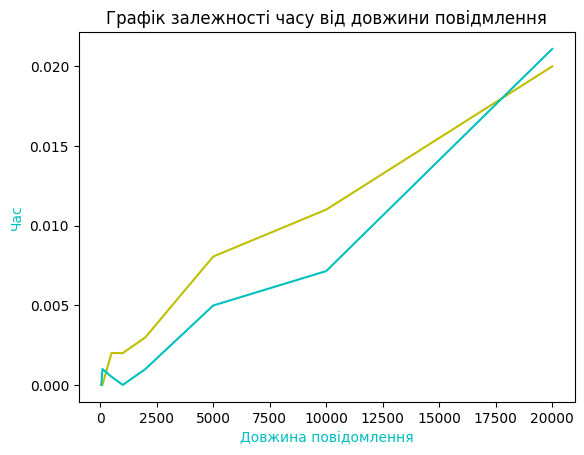

In [61]:
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import random
import string

algoritm = LZ77(50)

characters = string.ascii_letters + string.digits + string.punctuation + ' '
losses, losses2, result1, result2 = [], [], [], []
nums = [50, 100, 500, 1000, 2000, 5000, 10000, 20000]
for t in nums:
        sentence = ''.join(random.choice(characters) for _ in range(t))
        start = time.time()
        m = algoritm.encode(sentence)
        end = time.time()
        time_taken = (end - start)

        start2 = time.time()
        v = algoritm.decode(m)
        end2 = time.time()
        time_taken2 = (end2 - start2)
        
        print(time_taken, time_taken2)

        print(f'\n{"-"*len(sentence)}\nOriginal text: {sentence}\nDecoded text: {v}\n{"-"*len(sentence)}')

        losses.append(time_taken)
        losses2.append(time_taken2)

        result1.append(time_taken/len(sentence))
        result2.append(time_taken2/len(sentence))

Y = np.array([i for i in losses])
X = np.array([i for i in nums])
P = np.array([i for i in losses2])
plt.title("Графік залежності часу від довжини повідмлення")                                                                                                                                                                                        
plt.xlabel('Довжина повідомлення', c = 'c')
plt.ylabel('Час', c = 'c')
plt.plot(X, Y, c = 'y') # жовтий - encode
plt.plot(X, P, c= 'c') # синій - decode
plt.show()


24075
48492


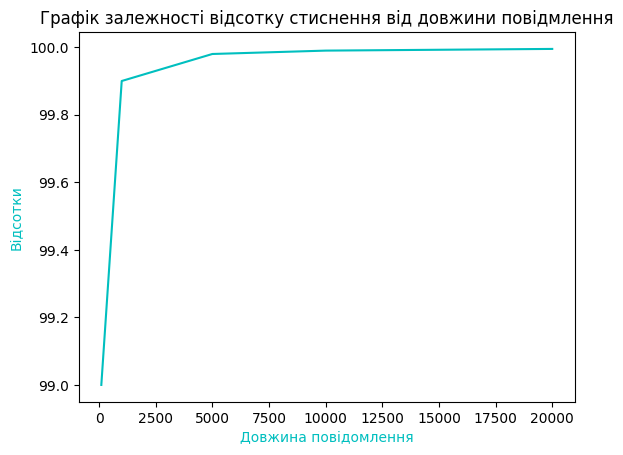

In [60]:
import matplotlib.pyplot as plt
import numpy as np

import random
import string

algoritm = LZ77(50)

characters = string.ascii_letters + string.digits + string.punctuation + ' '

nums = [100,1000, 5000, 10000, 20000]
length = []
for t in nums:
        sentence = ''.join(random.choice(characters) for _ in range(t))
        m = algoritm.encode(sentence).replace('¹', '')
        length.append(100 - (len(m[0])/len(sentence)*100))

X = np.array([i for i in nums])
P = np.array([i for i in length])
plt.title("Графік залежності відсотку стиснення від довжини повідмлення")                                                                                                                                                                                        
plt.xlabel('Довжина повідомлення', c = 'c')
plt.ylabel('Відсотки', c = 'c')
plt.plot(X, P, c= 'c')
plt.show()

#Як бачимо на графіку, чим довший текст, тим більший відсоток стиснення
# Також, алгоритм ефективніший при кодуванні книг ніж при послідовності радномних символів
# аналогічної довжини, оскільки в текстах часто повторюються слова




алгоритм працює, але для його справді корисного використання має співпасти дуже багато різних факторів, таких як: розмір вікна, висока повторюваність тексту, довжина тексту. Алгоритм найкраще працює на великих об'ємах даних і з великим розміром вікна, у інших випадках, він не є надто хорошим

# Алгоритм Deflate

In [ ]:
class Deflate:
    def __init__(self, buffer_size: int):
        pass

    def encode(self, text: str) -> str:
        pass

    def decode(self, code: str) -> str:
        pass

# Висновок:

Всі алгоритми краще працюють при великих файлах.

Найефективніше стиснення при кодуванні книг чи інших мовних текстів.
Чим частіше повторюються дані, тим краще працює алгоритм.
Найкраше працює lz77 та lzw на великих файлах.